In [77]:
import pandas as pd
import csv
import datetime
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import spacy
nlp = spacy.load('en_core_web_sm')
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json


In [78]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
!pip -q install kaggle

In [80]:
if not os.path.exists('/content/data/'):

    api_token = {"username": "gomteshjain12",
                 "key": "c1ce67cc586abf35c84ba89756ab5b72"}

    with open('/content/kaggle.json', 'w') as file:
        json.dump(api_token, file)

    os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

    os.system('kaggle datasets download -d shahzaibrehman/twitter-tweets-with-event-classification')
    os.makedirs('/content/data/', exist_ok=True)
    os.system('mv /content/twitter-tweets-with-event-classification.zip /content/data/twitter-tweets-with-event-classification.zip')
    os.system('unzip -q /content/data/twitter-tweets-with-event-classification.zip -d /content/data/')
    os.remove('/content/data/twitter-tweets-with-event-classification.zip')

In [133]:
df= pd.read_csv("/content/data/fyp.csv",header= 0,
                        encoding= 'unicode_escape')

In [143]:
df.shape

(1104, 3)

In [134]:
df.head()


,text,event,class
0,3.6 aftershock at 4:05 am. I was asleep and th...,earthquake,disaster
1,"Good Night my friends, As per USGS, the new 5....",earthquake,disaster
2,Yea it wasnt that long she killed me in like 6...,earthquake,disaster
3,Honored to have an essay in #AfterShock Markin...,earthquake,disaster
4,TICKETS ON SALE!!!!!!!!!! - Aftershock https:/...,earthquake,disaster


In [136]:
df['event'].value_counts()

rescued             135
tsunami             100
wildfire            100
christmas           100
independence day    100
eid                  96
thunderstorm         92
ramadan              80
sandstorm            63
snow storm           62
suicide bombing      51
earthquake           49
explosion            44
tornedo              32
Name: event, dtype: int64

In [141]:
len(df['event'].unique())

14

In [137]:
df['class'].value_counts()

disaster     306
alarming     287
religious    276
happy        235
Name: class, dtype: int64

In [103]:
#tweet preprocessing 

def text_preprocessing(text):
    
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^ A-Za-z]+', '', text)
    text = text.split()
    text = [word for word in text if word not in stopwords.words('english')]
    text = ' '.join(text)
    text = nlp(text)
    text = [word.lemma_ for word in text]
    text = ' '.join(text) 
    return text

In [104]:
from tqdm.notebook import tqdm
tqdm.pandas()

df['text'] = df['text'].progress_apply(text_preprocessing)

  0%|          | 0/1104 [00:00<?, ?it/s]

In [105]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['event labels'] = labelencoder.fit_transform(df['event'])
df['class labels'] = labelencoder.fit_transform(df['class'])
new_df = pd.DataFrame(df,columns = ['text', 'event','event labels','class','class labels'])
new_df

,text,event,event labels,class,class labels
0,aftershock I asleep movement bed wake not scar...,earthquake,1,disaster,1
1,Good Night friend as per USGS new quake mornin...,earthquake,1,disaster,1
2,yea be not long kill like second sure would,earthquake,1,disaster,1
3,honored essay AfterShock mark th anniversary A...,earthquake,1,disaster,1
4,ticket on SALE Aftershock nowplaying khdradio,earthquake,1,disaster,1
...,...,...,...,...,...
1099,RT miller SenJohnKennedy why Moscow Independen...,independence day,4,happy,2
1100,RT miller SenJohnKennedy why Moscow Independen...,independence day,4,happy,2
1101,RT MichaelDeLauzon from May July th watch Demo...,independence day,4,happy,2
1102,RT miller SenJohnKennedy why Moscow Independen...,independence day,4,happy,2


In [106]:
le_event = LabelEncoder()
le_class = LabelEncoder()
l1 = le_event.fit_transform(df["event"])
l2 = le_class.fit_transform(df["class"])
df= df.drop("class",axis='columns')
df= df.drop("event",axis='columns')


df

,text,event labels,class labels
0,aftershock I asleep movement bed wake not scar...,1,1
1,Good Night friend as per USGS new quake mornin...,1,1
2,yea be not long kill like second sure would,1,1
3,honored essay AfterShock mark th anniversary A...,1,1
4,ticket on SALE Aftershock nowplaying khdradio,1,1
...,...,...,...
1099,RT miller SenJohnKennedy why Moscow Independen...,4,2
1100,RT miller SenJohnKennedy why Moscow Independen...,4,2
1101,RT MichaelDeLauzon from May July th watch Demo...,4,2
1102,RT miller SenJohnKennedy why Moscow Independen...,4,2


In [107]:
df['event'] = l1
df['class'] = l2
df

,text,event labels,class labels,event,class
0,aftershock I asleep movement bed wake not scar...,1,1,1,1
1,Good Night friend as per USGS new quake mornin...,1,1,1,1
2,yea be not long kill like second sure would,1,1,1,1
3,honored essay AfterShock mark th anniversary A...,1,1,1,1
4,ticket on SALE Aftershock nowplaying khdradio,1,1,1,1
...,...,...,...,...,...
1099,RT miller SenJohnKennedy why Moscow Independen...,4,2,4,2
1100,RT miller SenJohnKennedy why Moscow Independen...,4,2,4,2
1101,RT MichaelDeLauzon from May July th watch Demo...,4,2,4,2
1102,RT miller SenJohnKennedy why Moscow Independen...,4,2,4,2


In [108]:
x = df["event"].values
y = df["class"].values
x = x.reshape(-1, 1)
y = y.reshape(-1,1)

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

the score of Decision Tree classifier is: 1.0


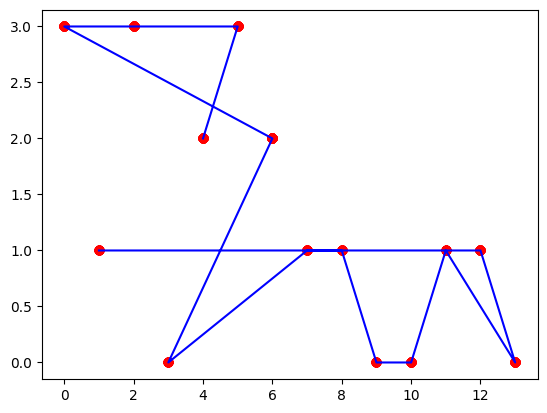

In [110]:
#DECISION TREE ALGO
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
print ('the score of Decision Tree classifier is:',score)
plt.scatter(x,y,color='red')
plt.plot(x,model.predict(x),color='blue')

In [111]:
def identifier(text):
    earthquake = ['earthquake','aftershock','aftershocks']
    tsunami = ['tsunami','flood']
    fire = ['wildfire','fire']
    tornedo = ['tornedo','twister', 'cyclone']
    thunderstorm = ['thunderstorm','storm']
    bombing = ['suicide bombing','bomb','bomber','explosive']
    snowstorm = ['snowstorm']
    sandstorm = ['sandstorm']
    explosion = ['explosion','blast']
    rescued = ['rescued','recovered','survived']
    christmas = ['christmas','xmas']
    eid = ['eid','eid ul fitr','eid ul adha']
    ramadan = ['ramzan','ramadan']
    independence = ['independence day','independence','day of independence']
    str = text.lower()
    if any(x in str for x in earthquake):
        return 1
    if any(x in str for x in tsunami):
        return 12
    if any(x in str for x in fire):
        return 13
    if any(x in str for x in tornedo):
        return 11
    if any(x in str for x in tsunami):
        return 12
    if any(x in str for x in thunderstorm):
        return 10
    if any(x in str for x in bombing):
        return 9
    if any(x in str for x in snowstorm):
        return 8
    if any(x in str for x in sandstorm):
        return 7
    if any(x in str for x in bombing):
        return 9
    if any(x in str for x in explosion):
        return 3
    if any(x in str for x in rescued):
        return 6
    if any(x in str for x in christmas):
        return 0
    if any(x in str for x in eid):
        return 2
    if any(x in str for x in ramadan):
        return 5
    if any(x in str for x in independence):
        return 4

In [112]:
def classifier(x):
    if x == 1:
        a = 'disaster'
        return a
    if x == 0:
        a = 'alarming'
        return a
    if x == 2:
        a = 'happy'
        return a
    if x == 3:
        a = 'religious'
        return a

In [113]:
def check(x):
    try:
        a = classifier(model.predict([[identifier(x)]])) 
        return a
    except:
        print("") 

In [114]:
text=['today earthquake occured in lahore','i am sensing a thunderstorm','Eid mubarak all muslims!']

dp = pd.DataFrame(text,columns=['text'])

dp

,text
0,today earthquake occured in lahore
1,i am sensing a thunderstorm
2,Eid mubarak all muslims!


In [115]:
dp['text'] = dp['text'].progress_apply(text_preprocessing)
dp['predictions']=dp['text'].progress_apply(check)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [116]:
new_dp = pd.DataFrame(dp,columns = ['text', 'predictions'])


In [117]:
new_dp


,text,predictions
0,today earthquake occur lahore,disaster
1,sense thunderstorm,alarming
2,Eid mubarak muslim,religious


#event

In [118]:
tex_list = df['text'].progress_apply(text_preprocessing)

  0%|          | 0/1104 [00:00<?, ?it/s]

In [119]:
tex_list

0       aftershock I asleep movement bed wake scary I ...
1       Good Night friend per USGS new quake morning c...
2                    yea long kill like second sure would
3       honor essay AfterShock mark th anniversary Alv...
4              ticket sale Aftershock nowplaying khdradio
                              ...                        
1099    RT miller SenJohnKennedy Moscow Independence D...
1100    RT miller SenJohnKennedy Moscow Independence D...
1101    RT MichaelDeLauzon may July th watch Democrats...
1102    RT miller SenJohnKennedy Moscow Independence D...
1103    RT miller SenJohnKennedy Moscow Independence D...
Name: text, Length: 1104, dtype: object

In [120]:

import spacy

nlp = spacy.load("en_core_web_sm")

In [121]:
import warnings 
warnings.filterwarnings('ignore')

In [122]:
from spacy import displacy

In [123]:
doc = nlp(", ".join(tex_list[2:20]))
displacy.render(doc, style="ent", jupyter=True)


In [124]:
print('ORDINAL:',spacy.explain("ORDINAL"))
print('PERSON:',spacy.explain("PERSON"))
print('ORG:',spacy.explain("ORG"))
print('LOC:',spacy.explain("LOC"))
print('NORP:',spacy.explain("NORP"))
print('GPE:',spacy.explain("GPE"))
print('CARDINAL:',spacy.explain("CARDINAL"))
print('TIME:',spacy.explain("TIME"))
print('DATE:',spacy.explain("DATE"))
print('EVENT:',spacy.explain("EVENT"))

ORDINAL: "first", "second", etc.
PERSON: People, including fictional
ORG: Companies, agencies, institutions, etc.
LOC: Non-GPE locations, mountain ranges, bodies of water
NORP: Nationalities or religious or political groups
GPE: Countries, cities, states
CARDINAL: Numerals that do not fall under another type
TIME: Times smaller than a day
DATE: Absolute or relative dates or periods
EVENT: Named hurricanes, battles, wars, sports events, etc.


In [125]:
displacy.render(doc, style="dep", jupyter=True)


In [126]:

def extract_event(tweet):
    doc = nlp(tweet)
    
    # Define the event-related POS tags and named entity labels
    event_pos_tags = ["NOUN", "VERB", "ADJ"]
    event_ner_labels = ["DATE", "TIME", "GPE", "LOC", "EVENT"]
    
    # Extract the event-related information from the tweet
    event = {}
    for token in doc:
        if token.pos_ in event_pos_tags or token.ent_type_ in event_ner_labels:
            if token.ent_type_ in event_ner_labels:
                if token.ent_type_ == "DATE":
                    event["date"] = token.text
                elif token.ent_type_ == "TIME":
                    event["time"] = token.text
                elif token.ent_type_ in ["GPE", "LOC"]:
                    event["location"] = token.text
                elif token.ent_type_ == "EVENT":
                    event["type"] = token.text
            else:
                if token.pos_ == "NOUN":
                    event["type"] = token.text
                elif token.pos_ == "VERB":
                    event["action"] = token.text
                elif token.pos_ == "ADJ":
                    event["description"] = token.text
    
    return event


In [127]:
extract_event(tex_list[813])

{'type': 'year', 'date': 'christmas', 'description': 'new', 'action': 'sayup'}

In [128]:
event_df = pd.DataFrame(columns=["type", "date", "time", "location", "action", "description"])
count=0   
for i in tex_list:
  out = extract_event(i)
  event_df = event_df.append(out, ignore_index=True)
  if count%100 == 0:
    print(count)
  count += 1

0
100
200
300
400
500
600
700
800
900
1000
1100


In [129]:
event_df

,type,date,time,location,action,description
0,bed,NaN,NaN,NaN,wish,scary
1,change,NaN,morning,NaN,NaN,new
2,NaN,NaN,NaN,NaN,kill,sure
3,essay,NaN,NaN,NaN,NaN,NaN
4,khdradio,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1099,traitor,NaN,NaN,NaN,NaN,NaN
1100,traitor,NaN,NaN,NaN,NaN,NaN
1101,celebra,July,NaN,NaN,take,big
1102,traitor,NaN,NaN,NaN,NaN,NaN


In [130]:
event_df.to_csv('tweets_event.csv')

In [131]:
tex_list[326]

'NWSSPC SPC Jan Z Thunderstorm Outlook'